In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
dataframe = pd.read_csv(r"Dataset40D.csv")
dataframe

,Price,Quantity,Customer ID,InvoiceDate,Description,StockCode,Quantity.1,Quantity.2,Quantity.3,Price.1,Price.2,Price.3
0,6.95,12,-1.554577,-0.643216,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1.899246,0.0011,-0.000003,-0.000477,0.023559,0.882579,0.013426
1,2.10,48,-1.554577,-0.643216,"RECORD FRAME 7"" SINGLE SIZE",-0.201893,0.0047,0.003597,0.516378,0.007119,-0.198194,-0.003015
2,1.25,24,-1.554577,-0.643216,STRAWBERRY CERAMIC TRINKET BOX,-1.148082,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
3,1.65,24,-1.554577,-0.643216,PINK DOUGHNUT TRINKET POT,-0.167350,0.0023,0.001197,0.171808,0.005593,-0.298472,-0.004540
4,1.25,24,-1.554577,-0.643216,SAVE THE PLANET MUG,-0.367101,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
...,...,...,...,...,...,...,...,...,...,...,...,...
318900,2.95,2,1.238773,-0.251354,FELTCRAFT DOLL ROSIE,0.121012,0.0001,-0.001003,-0.144048,0.010000,-0.008780,-0.000134
318901,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS LOLA DOLL,0.798363,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
318902,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS OLIVIA DOLL,0.799865,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
318903,3.75,2,1.238773,-0.251354,PINK FLORAL FELTCRAFT SHOULDER BAG,-1.451463,0.0001,-0.001003,-0.144048,0.012712,0.169492,0.002578


In [ ]:
dataframe.describe()

,Price,Quantity,Customer ID,InvoiceDate,StockCode,Quantity.1,Quantity.2,Quantity.3,Price.1,Price.2,Price.3
count,318905.000000,318905.000000,3.189050e+05,3.189050e+05,3.189050e+05,318905.000000,3.189050e+05,3.189050e+05,318905.000000,3.189050e+05,3.189050e+05
mean,2.989402,12.033242,-1.109231e-16,1.490331e-14,7.247228e-15,0.001103,-2.255750e-17,4.228904e-15,0.010134,9.749869e-13,1.475977e-14
std,4.487527,69.651959,1.000000e+00,1.000000e+00,1.000000e+00,0.006966,6.965893e-03,1.000000e+00,0.015212,1.000000e+00,1.521195e-02
min,0.000000,1.000000,-2.018983e+00,-1.669865e+00,-1.894519e+00,0.000000,-1.103435e-03,-1.584053e-01,0.000000,-6.661581e-01,-1.013357e-02
25%,1.250000,2.000000,-8.475984e-01,-8.978100e-01,-7.771159e-01,0.000100,-1.003425e-03,-1.440482e-01,0.004237,-3.876082e-01,-5.896279e-03
50%,1.950000,4.000000,1.585757e-02,-2.179576e-02,-1.716132e-02,0.000300,-8.034045e-04,-1.153340e-01,0.006610,-2.316203e-01,-3.523397e-03
75%,3.750000,12.000000,8.654882e-01,8.737373e-01,6.316536e-01,0.001100,-3.324520e-06,-4.772568e-04,0.012712,1.694915e-01,2.578298e-03
max,295.000000,10000.000000,1.714490e+00,1.764603e+00,2.178597e+00,1.000000,9.988966e-01,1.433982e+02,1.000000,6.507161e+01,9.898664e-01


In [ ]:
print(dataframe.groupby('StockCode').size())

StockCode
-1.894519    217
-1.893018      6
-1.891516      1
-1.890014     34
-1.888512     65
            ... 
 2.172589     10
 2.174091      7
 2.175593     25
 2.177095      2
 2.178597      7
Length: 2713, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


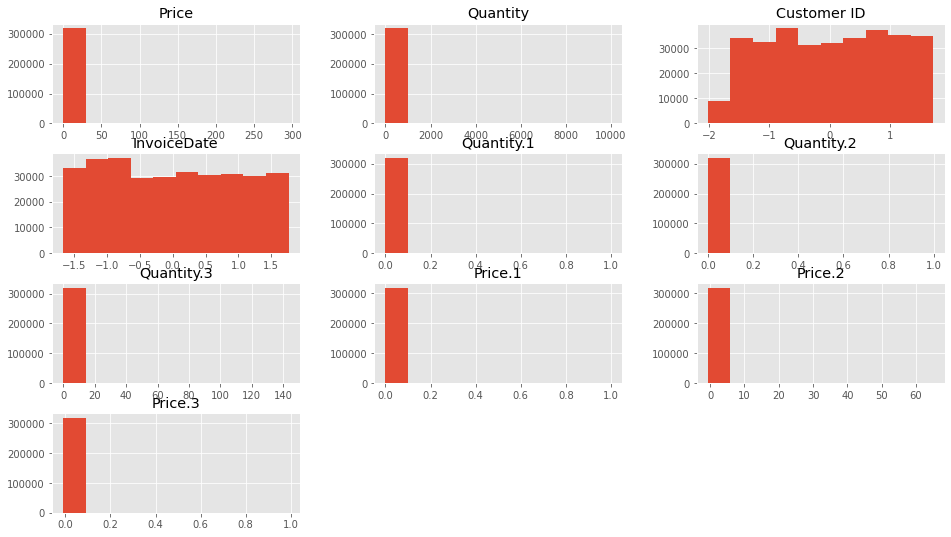

In [ ]:
dataframe.drop(['StockCode'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


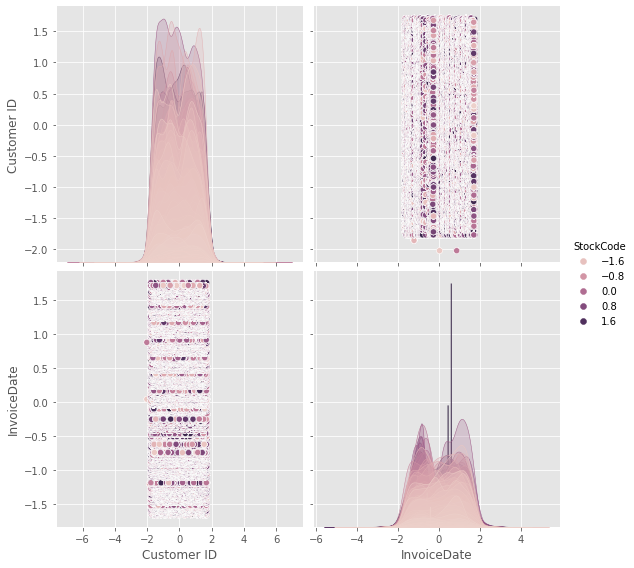

In [ ]:
sb.pairplot(dataframe.dropna(), hue='StockCode',size=4,vars=["Customer ID","InvoiceDate"],kind='scatter')

In [ ]:
X = np.array(dataframe[["Customer ID","InvoiceDate"]])
y = np.array(dataframe['StockCode'])
X.shape

(318905, 2)

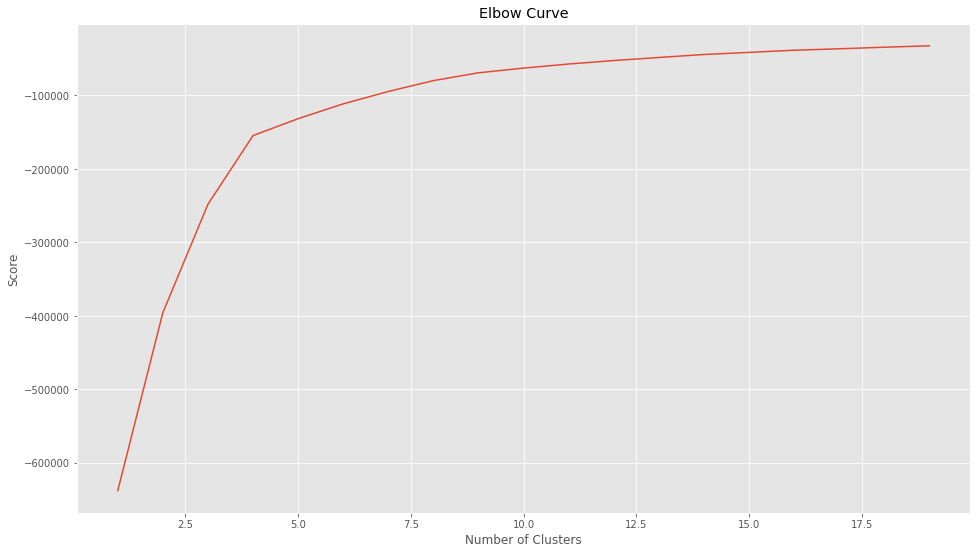

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.90703905 -0.84491337]
 [ 0.84471165  0.88774968]
 [ 0.8147705  -0.85836123]
 [-0.91557657  0.89540093]]


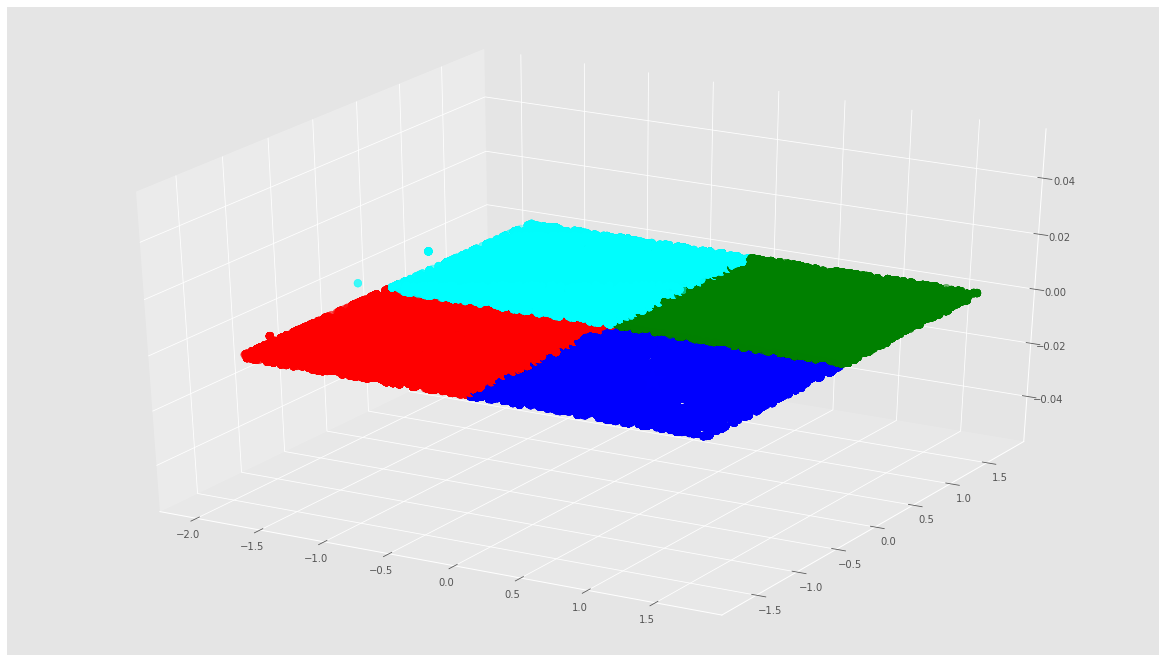

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

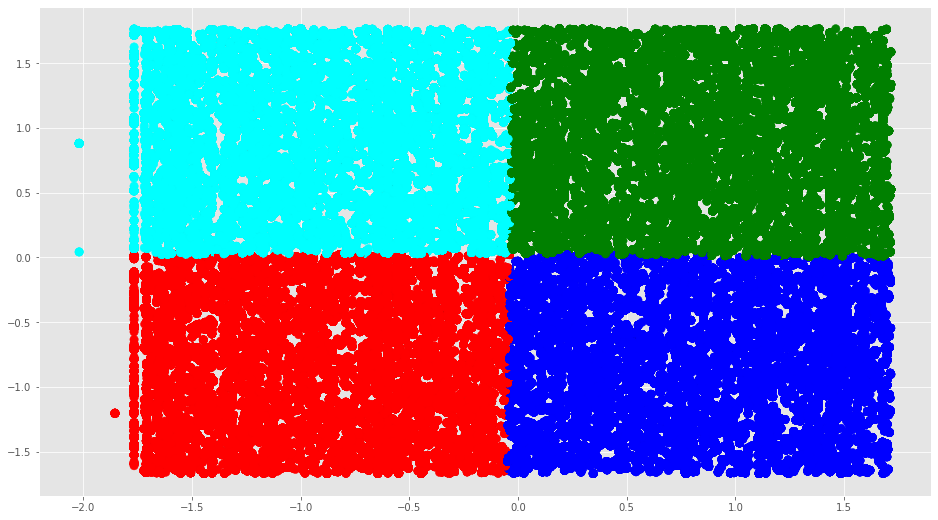

In [ ]:
# Getting the values and plotting it
f1 = dataframe['Customer ID'].values
f2 = dataframe['InvoiceDate'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['Description']=dataframe['Description'].values
copy['StockCode']=dataframe['StockCode'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,77036
1,green,80619
2,blue,86259
3,cyan,74991


In [ ]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['StockCode']=[-1.554577]
diversidadGrupo['cantidad']=group_referrals.groupby('StockCode').size()
diversidadGrupo

,StockCode,cantidad
0,-1.554577,NaN


In [ ]:
diversidadGrupo.shape

(10, 2)

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([297026, 146514, 295913, 146182])

In [ ]:
users=dataframe['Description'].values
for row in closest:
    print(users[row])

BOX OF 9 PEBBLE CANDLES
VICTORIAN SEWING BOX LARGE
T-LIGHT GLASS FLUTED ANTIQUE
POTTERING IN THE SHED METAL SIGN


In [ ]:
X_new = np.array([[-1.554577,-0.643216]])

In [ ]:
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


In [ ]:
dataframe['KMeans_Clusters'] = kmeans.labels_
dataframe

,Price,Quantity,Customer ID,InvoiceDate,Description,StockCode,Quantity.1,Quantity.2,Quantity.3,Price.1,Price.2,Price.3,KMeans_Clusters
0,6.95,12,-1.554577,-0.643216,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1.899246,0.0011,-0.000003,-0.000477,0.023559,0.882579,0.013426,0
1,2.10,48,-1.554577,-0.643216,"RECORD FRAME 7"" SINGLE SIZE",-0.201893,0.0047,0.003597,0.516378,0.007119,-0.198194,-0.003015,0
2,1.25,24,-1.554577,-0.643216,STRAWBERRY CERAMIC TRINKET BOX,-1.148082,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896,0
3,1.65,24,-1.554577,-0.643216,PINK DOUGHNUT TRINKET POT,-0.167350,0.0023,0.001197,0.171808,0.005593,-0.298472,-0.004540,0
4,1.25,24,-1.554577,-0.643216,SAVE THE PLANET MUG,-0.367101,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318900,2.95,2,1.238773,-0.251354,FELTCRAFT DOLL ROSIE,0.121012,0.0001,-0.001003,-0.144048,0.010000,-0.008780,-0.000134,2
318901,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS LOLA DOLL,0.798363,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578,2
318902,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS OLIVIA DOLL,0.799865,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578,2
318903,3.75,2,1.238773,-0.251354,PINK FLORAL FELTCRAFT SHOULDER BAG,-1.451463,0.0001,-0.001003,-0.144048,0.012712,0.169492,0.002578,2


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# Transfomración de datos categóricos a numéricos
le = preprocessing.LabelEncoder()
fg = pd.DataFrame(dataframe['Price'])
# Se transforman todas las columnas
X_2 = fg.apply(le.fit_transform)
X_2

,Price
0,197
1,99
2,67
3,83
4,67
...,...
318900,123
318901,142
318902,142
318903,142


In [ ]:
Standariza=(X_2['Price']-X_2['Price'].mean())/X_2['Price'].std()
Standariza = pd.DataFrame(Standariza)

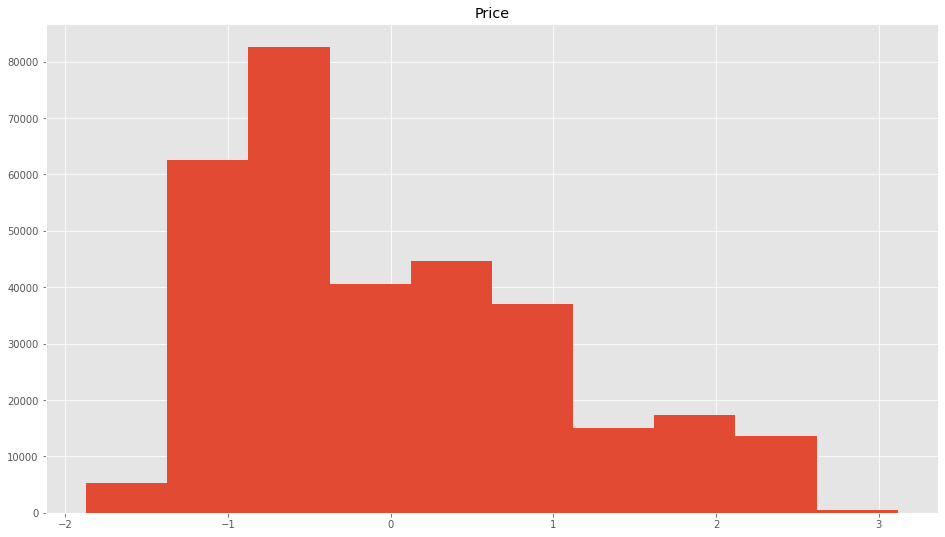

In [ ]:
Standariza.hist()
plt.show()

In [ ]:
sb.pairplot(dataframe.dropna(), hue='StockCode',size=4,vars=["Customer ID","InvoiceDate"],kind='scatter')